# Importing libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats 
%matplotlib inline

# Loading dataset

In [2]:
df = pd.read_csv(r'E:\Downloads\Car_sales.csv')

In [3]:
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

# Exploratory data analysis

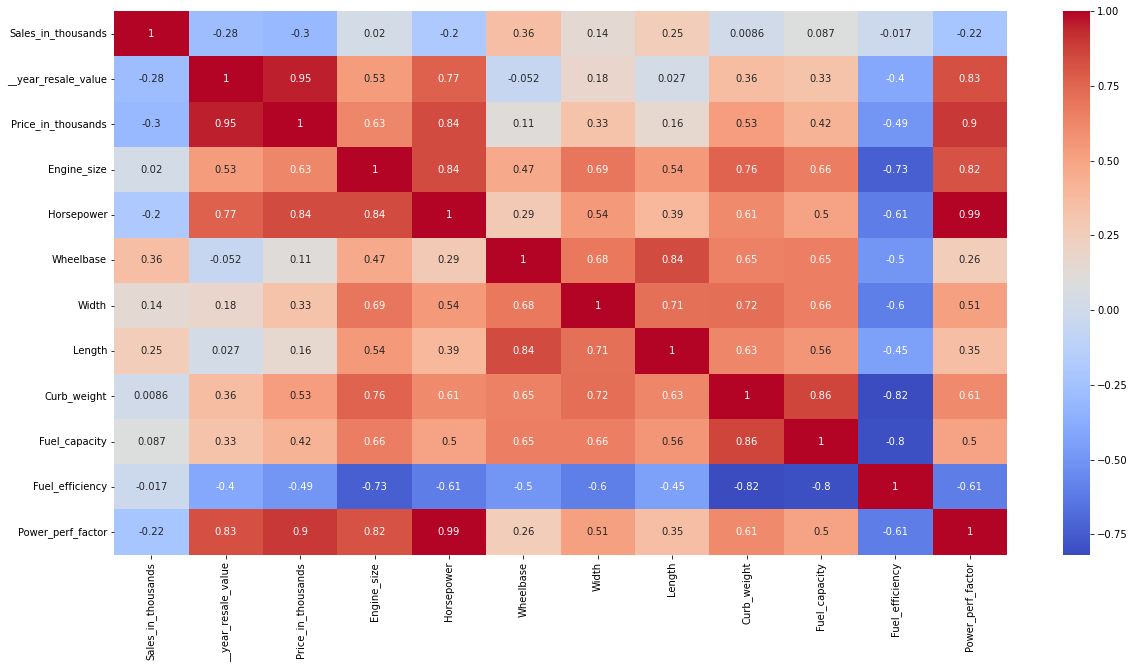

In [5]:
corr = df.corr()
sns.heatmap(corr,cmap='coolwarm',annot=True)
plt.gcf().set_size_inches(20, 10)

In [6]:
cat_cols = ['Manufacturer','Model','Vehicle_type','Latest_Launch']
for col in cat_cols:
    print(f'Number of Unique values in {col} is {df[col].nunique()}')

Number of Unique values in Manufacturer is 30
Number of Unique values in Model is 156
Number of Unique values in Vehicle_type is 2
Number of Unique values in Latest_Launch is 130


In [7]:
df['Manufacturer']

0      Acura
1      Acura
2      Acura
3      Acura
4       Audi
       ...  
152    Volvo
153    Volvo
154    Volvo
155    Volvo
156    Volvo
Name: Manufacturer, Length: 157, dtype: object

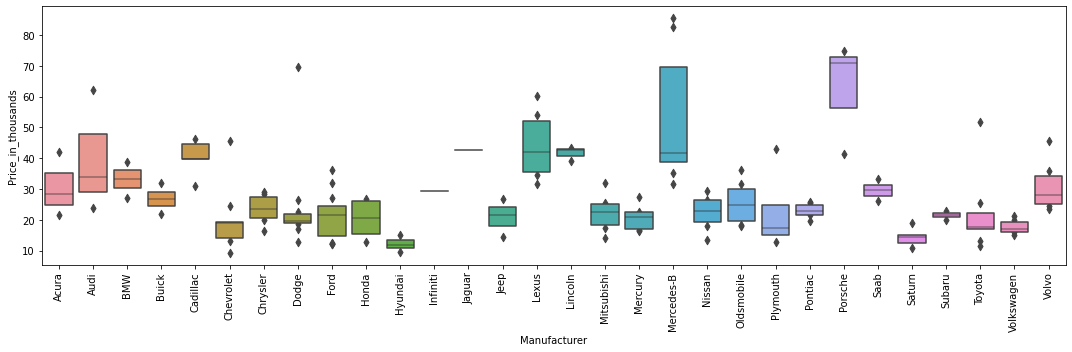

In [8]:
plt.figure(figsize=(15,5))
plt.xticks(rotation = 90)
sns.boxenplot(x='Manufacturer',y='Price_in_thousands',data=df)
plt.tight_layout()

In [9]:
df['Vehicle_type'].unique()

array(['Passenger', 'Car'], dtype=object)

<AxesSubplot:>

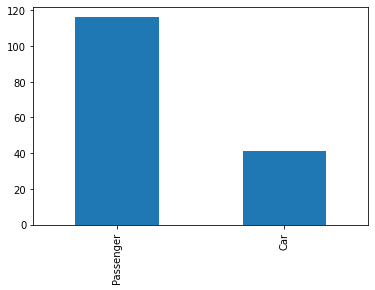

In [10]:
df['Vehicle_type'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Vehicle_type', ylabel='Price_in_thousands'>

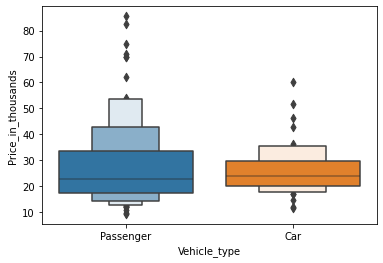

In [11]:
sns.boxenplot(x=df['Vehicle_type'],y=df['Price_in_thousands'])

In [12]:
df['Latest_Launch']

0        2/2/2012
1        6/3/2011
2        1/4/2012
3       3/10/2011
4       10/8/2011
          ...    
152     9/21/2011
153    11/24/2012
154     6/25/2011
155     4/26/2011
156    11/14/2011
Name: Latest_Launch, Length: 157, dtype: object

We can see here that the date where the car was launched is encoded in the DataFrame as a string so we need to transform it into a datetime column then extract the year where the car was launched 


In [13]:
df['Latest_Launch'] = pd.to_datetime(df['Latest_Launch'])
df['Latest_Launch']

0     2012-02-02
1     2011-06-03
2     2012-01-04
3     2011-03-10
4     2011-10-08
         ...    
152   2011-09-21
153   2012-11-24
154   2011-06-25
155   2011-04-26
156   2011-11-14
Name: Latest_Launch, Length: 157, dtype: datetime64[ns]

In [14]:
df['Year_launched'] = df['Latest_Launch'].apply(lambda x : x.year)
df['Year_launched']

0      2012
1      2011
2      2012
3      2011
4      2011
       ... 
152    2011
153    2012
154    2011
155    2011
156    2011
Name: Year_launched, Length: 157, dtype: int64

In [15]:
df['Model']

0      Integra
1           TL
2           CL
3           RL
4           A4
        ...   
152        V40
153        S70
154        V70
155        C70
156        S80
Name: Model, Length: 157, dtype: object

Due to the fact that every single instance/record in the dataset has a unique model , then we believe that this column wont add additional information to our model, so its better to remove it

In [16]:
df = df.drop('Model',axis=1)

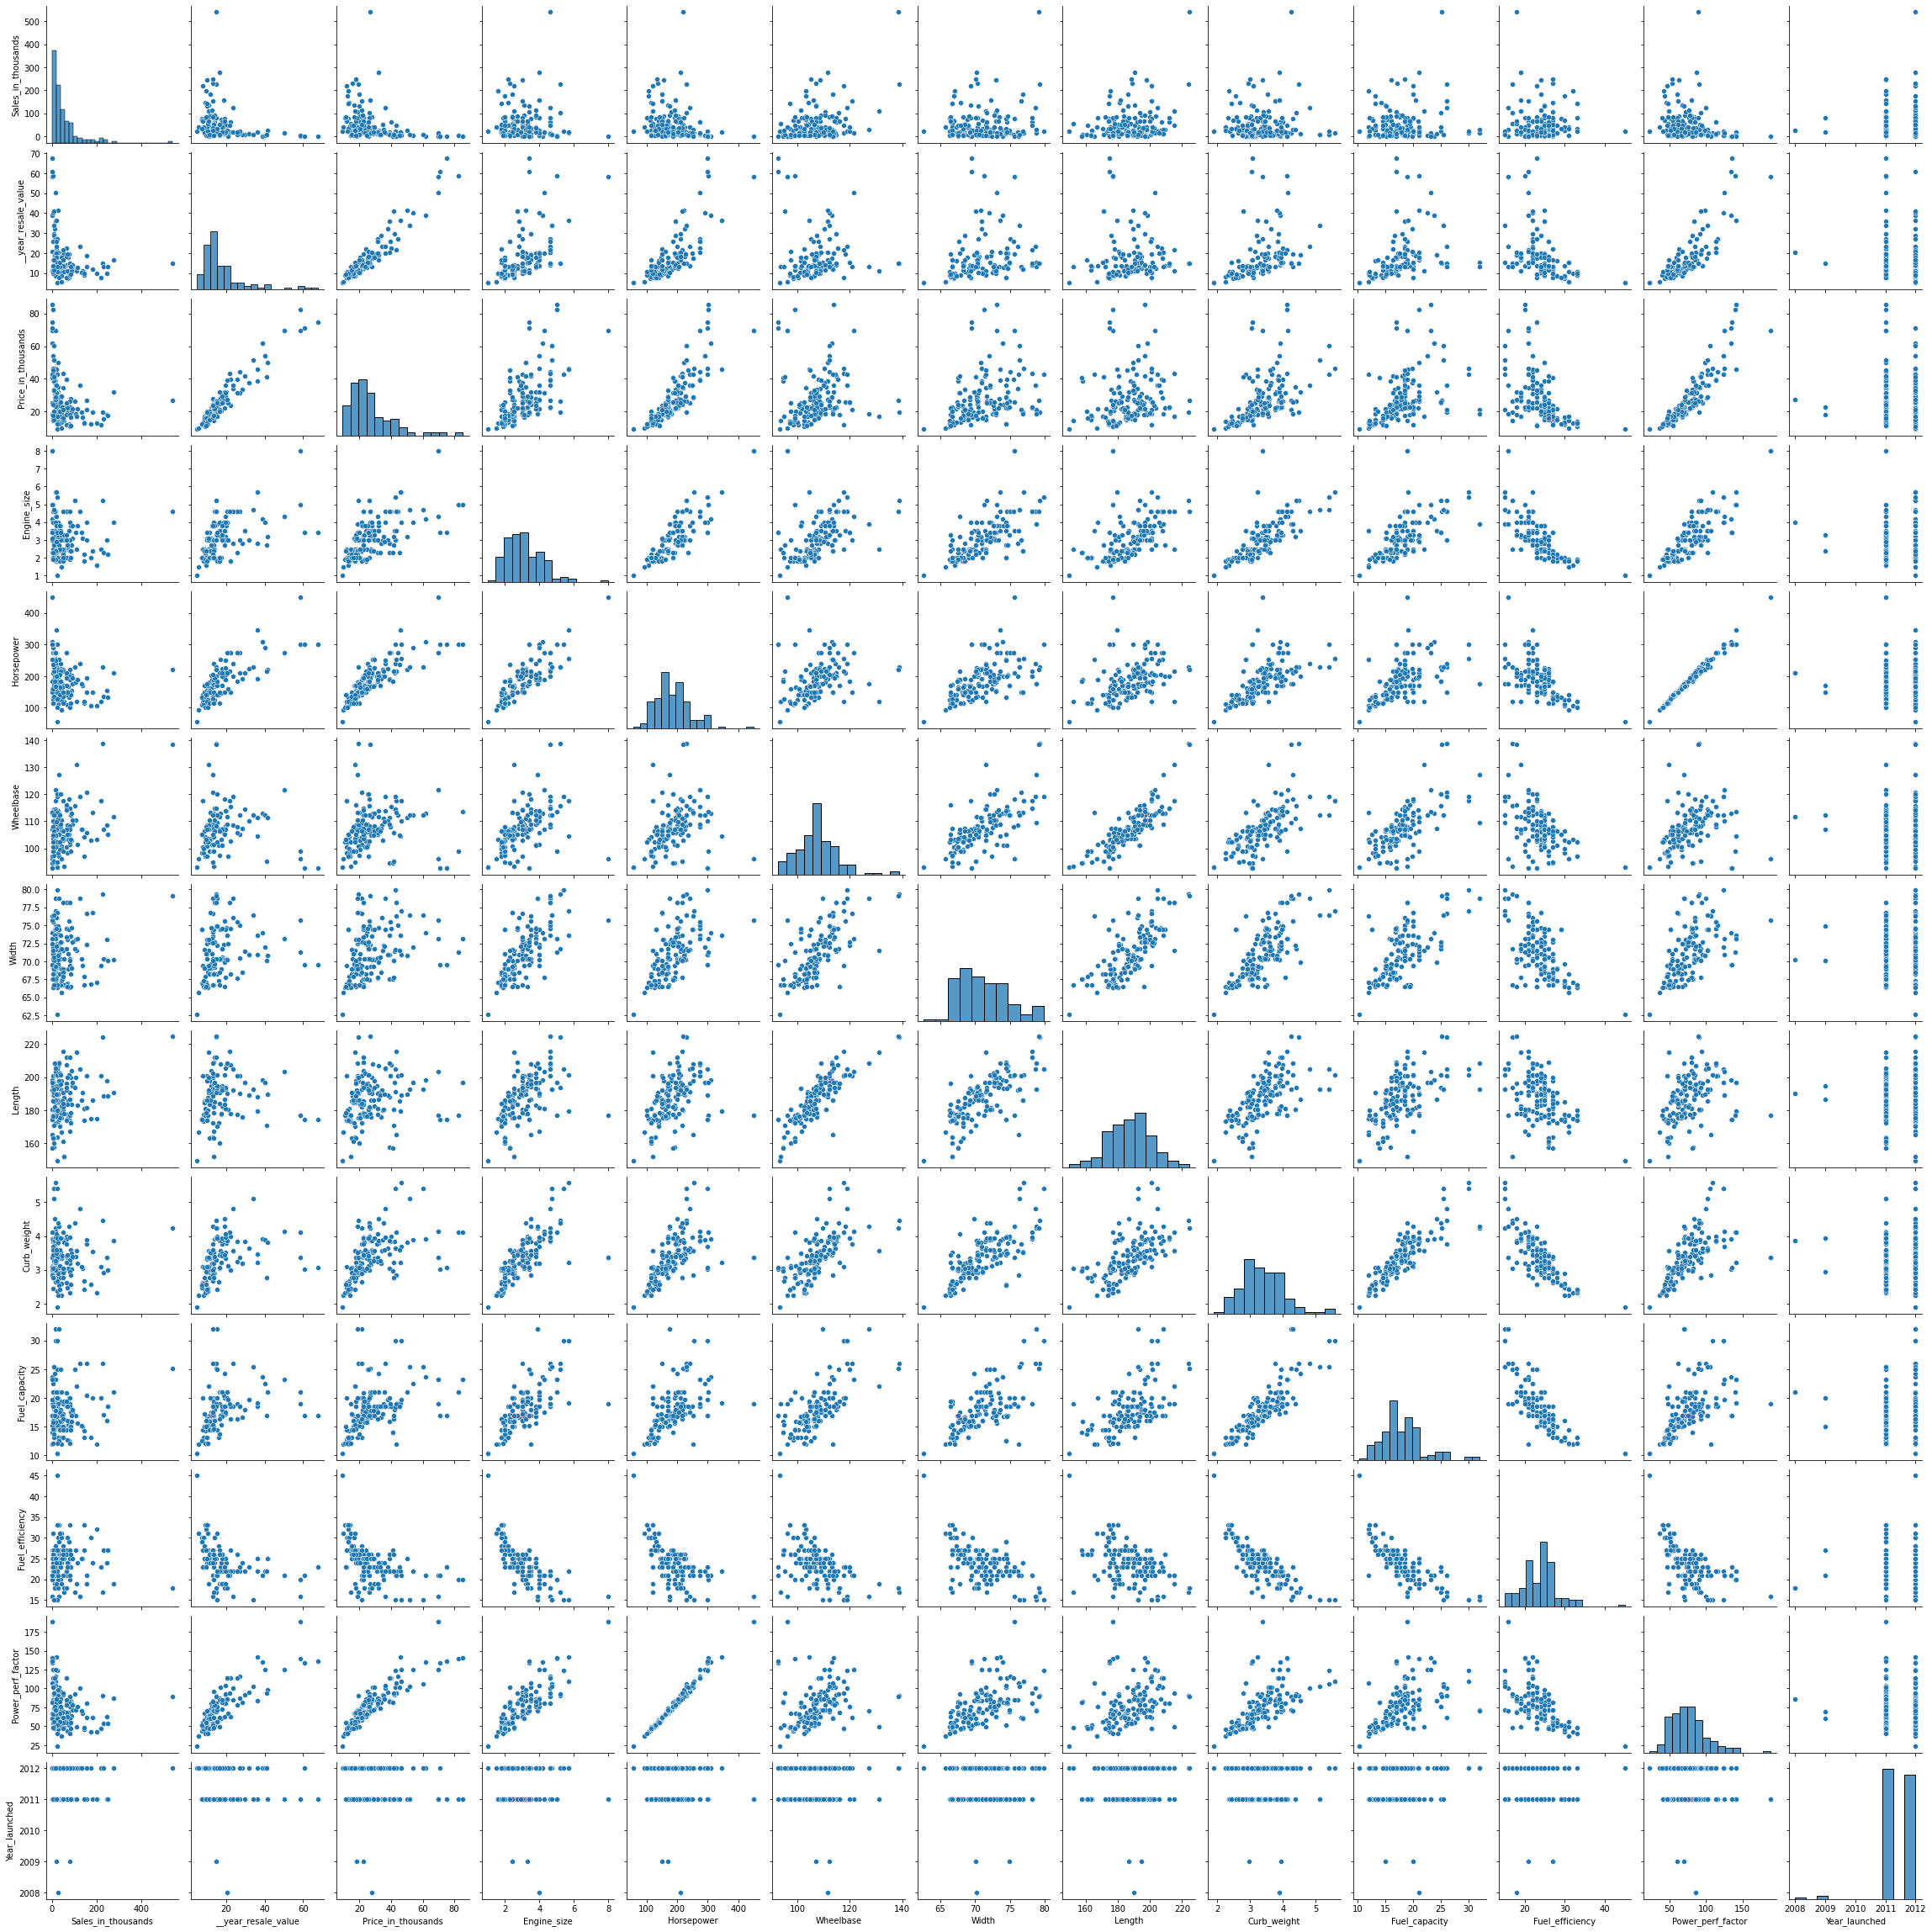

In [17]:
#Testing the linearity of the data compared to price 
sns.pairplot(df)

# Pre-processing categorical columns

In [36]:
cat_cols

['Manufacturer', 'Model', 'Vehicle_type', 'Latest_Launch']

##### we already dealt with the latest launch column and converted it into year_launched col so we can drop it

In [37]:
new_df = new_df.drop('Latest_Launch',axis=1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 149
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         117 non-null    object 
 1   Sales_in_thousands   117 non-null    float64
 2   __year_resale_value  117 non-null    float64
 3   Vehicle_type         117 non-null    object 
 4   Price_in_thousands   117 non-null    float64
 5   Engine_size          117 non-null    float64
 6   Horsepower           117 non-null    float64
 7   Wheelbase            117 non-null    float64
 8   Width                117 non-null    float64
 9   Length               117 non-null    float64
 10  Curb_weight          117 non-null    float64
 11  Fuel_capacity        117 non-null    float64
 12  Fuel_efficiency      117 non-null    float64
 13  Power_perf_factor    117 non-null    float64
 14  Year_launched        117 non-null    int64  
dtypes: float64(12), int64(1), object(2)
memo

In [38]:
new_df.groupby('Manufacturer').median()['Price_in_thousands'].sort_values().index

Index(['Hyundai', 'Saturn', 'Plymouth', 'Toyota', 'Volkswagen', 'Chevrolet',
       'Dodge', 'Honda', 'Mercury', 'Ford', 'Jeep', 'Pontiac', 'Chrysler',
       'Mitsubishi', 'Nissan', 'Buick', 'Acura', 'Oldsmobile', 'Infiniti',
       'Audi', 'BMW', 'Lexus', 'Cadillac', 'Lincoln', 'Mercedes-B', 'Porsche'],
      dtype='object', name='Manufacturer')

In [39]:
#We are going to perform label encoding for manufacturer column but instead of randomly encoding it with number from 1-30 we will encode them according to their medians the higher the median the higher the no for example porsche will be 30
dmap = {'Hyundai': 5, 'Saturn':6, 'Plymouth':7, 'Toyota':8, 'Volkswagen':9, 'Chevrolet':10,
       'Dodge':11, 'Honda':12, 'Mercury':13, 'Ford':14, 'Jeep':15, 'Pontiac':16, 'Chrysler':17,
       'Mitsubishi':18, 'Nissan':19, 'Buick':20, 'Acura':21, 'Oldsmobile':22, 'Infiniti':23,
       'Audi':24, 'BMW':25, 'Lexus':26, 'Cadillac':27, 'Lincoln':28, 'Mercedes-B':29, 'Porsche':30}
new_df['Manfacturer_no'] = new_df['Manufacturer'].map(dmap)
new_df

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Year_launched,Manfacturer_no
0,Acura,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,2012,21
1,Acura,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,2011,21
3,Acura,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,2011,21
4,Audi,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,2011,24
5,Audi,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105,2011,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Volkswagen,9.761,11.425,Passenger,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,46.943877,2011,9
146,Volkswagen,83.721,13.240,Passenger,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,47.638237,2011,9
147,Volkswagen,51.102,16.725,Passenger,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,61.701381,2012,9
148,Volkswagen,9.569,16.575,Passenger,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,48.907372,2011,9


In [40]:
new_df

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Year_launched,Manfacturer_no
0,Acura,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,2012,21
1,Acura,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,2011,21
3,Acura,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,2011,21
4,Audi,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,2011,24
5,Audi,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105,2011,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Volkswagen,9.761,11.425,Passenger,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,46.943877,2011,9
146,Volkswagen,83.721,13.240,Passenger,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,47.638237,2011,9
147,Volkswagen,51.102,16.725,Passenger,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,61.701381,2012,9
148,Volkswagen,9.569,16.575,Passenger,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,48.907372,2011,9


In [70]:
new_df['is_car'] = new_df['Vehicle_type'].map({'Passenger':0,'Car':1})
new_df

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Year_launched,Manfacturer_no,is_car
0,Acura,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,2012,21,0
1,Acura,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,2011,21,0
3,Acura,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,2011,21,0
4,Audi,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,2011,24,0
5,Audi,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105,2011,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Volkswagen,9.761,11.425,Passenger,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,46.943877,2011,9,0
146,Volkswagen,83.721,13.240,Passenger,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,47.638237,2011,9,0
147,Volkswagen,51.102,16.725,Passenger,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,61.701381,2012,9,0
148,Volkswagen,9.569,16.575,Passenger,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,48.907372,2011,9,0


# Model preparation and features selection

In [42]:
#Creating a new dataframe that stores each variable and its correlation and p-value compared to price in thousands , in order to extract the independant variables that affect the target column the most and exclude the ones that dont

cols = [ 'Sales_in_thousands', '__year_resale_value',
       'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Power_perf_factor',
       'Year_launched','Manfacturer_no','is_car']
corrs = []
for col in cols :
    r,p = stats.pearsonr(new_df[col],new_df['Price_in_thousands'])
    x = [col,r,p]
    corrs.append(x)
corrs
cor_n_p = pd.DataFrame(corrs, columns = ['Variable','Correlation with price','P-value'])
cor_n_p

,Variable,Correlation with price,P-value
0,Sales_in_thousands,-0.251705,6.189094e-03
1,__year_resale_value,0.954757,2.100553e-62
2,Engine_size,0.649170,2.449844e-15
3,Horsepower,0.853455,2.456802e-34
4,Wheelbase,0.067042,4.726365e-01
5,Width,0.301292,9.632801e-04
6,Length,0.182592,4.878944e-02
7,Curb_weight,0.511400,3.811653e-09
8,Fuel_capacity,0.406496,5.424016e-06
9,Fuel_efficiency,-0.479539,4.495393e-08


In [43]:
#For better interpretation of p-value we will test it against a threshhold and return true (if it passes the threshold) or false (if it doesnt)
cor_n_p['Passes_threshhold'] = cor_n_p['P-value'].apply(lambda x : x < 0.001)
cor_n_p

,Variable,Correlation with price,P-value,Passes_threshhold
0,Sales_in_thousands,-0.251705,6.189094e-03,False
1,__year_resale_value,0.954757,2.100553e-62,True
2,Engine_size,0.649170,2.449844e-15,True
3,Horsepower,0.853455,2.456802e-34,True
4,Wheelbase,0.067042,4.726365e-01,False
5,Width,0.301292,9.632801e-04,True
6,Length,0.182592,4.878944e-02,False
7,Curb_weight,0.511400,3.811653e-09,True
8,Fuel_capacity,0.406496,5.424016e-06,True
9,Fuel_efficiency,-0.479539,4.495393e-08,True


In [71]:
#storing features that passed the p-test threshold in a list , these are the features that we are going to use in our model
variables = list(cor_n_p[cor_n_p['Passes_threshhold']==True]['Variable'])
variables

['__year_resale_value',
 'Engine_size',
 'Horsepower',
 'Width',
 'Curb_weight',
 'Fuel_capacity',
 'Fuel_efficiency',
 'Power_perf_factor',
 'Manfacturer_no']

# Modeling

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [55]:
X = new_df[variables]
y = new_df['Price_in_thousands']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
model = LinearRegression()

In [57]:
model.fit(X_train,y_train)

LinearRegression()

In [58]:
predictions = model.predict(X_test)

In [59]:
r2_score(y_test,predictions)

1.0

In [60]:
mean_squared_error(y_test,predictions)

8.458312843958065e-16

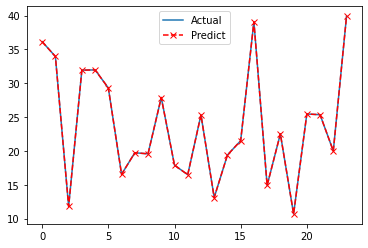

In [67]:
#%% - Visualization
plt.plot(list(y_test),label = 'Actual')
plt.plot(predictions, label = 'Predict', marker = 'x', color = 'red', linestyle = '--')
plt.legend()
plt.show()